In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns 

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel("iris.xls")

### Feature discription

In [3]:
data.shape

(150, 5)

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Filling missing values 

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are 7 missing values in Sepal Length, 6 missing values in Petal Length and 6 missing values in Sepal Width

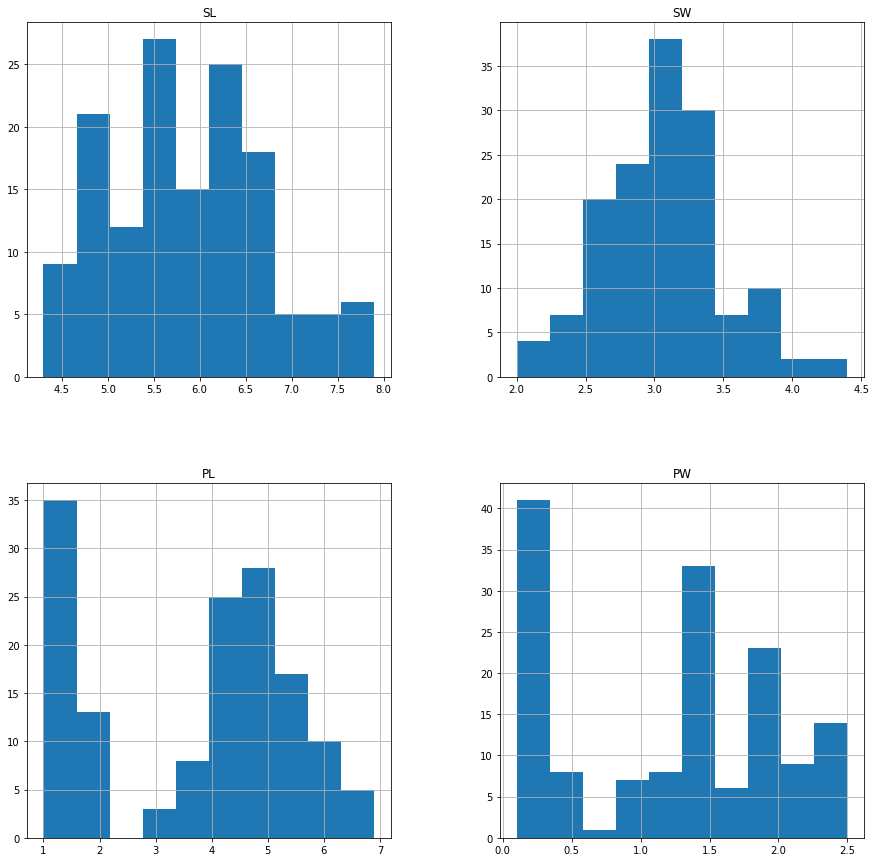

In [7]:
data.hist(figsize=(15,15))
plt.show()

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
#filling missing values with median since it's all numerical values
missing=['SL', 'SW', 'PL']
for i in missing:
    data[i] = data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now all missing values are filled. 

# 2. Do necessary pre-processing steps.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


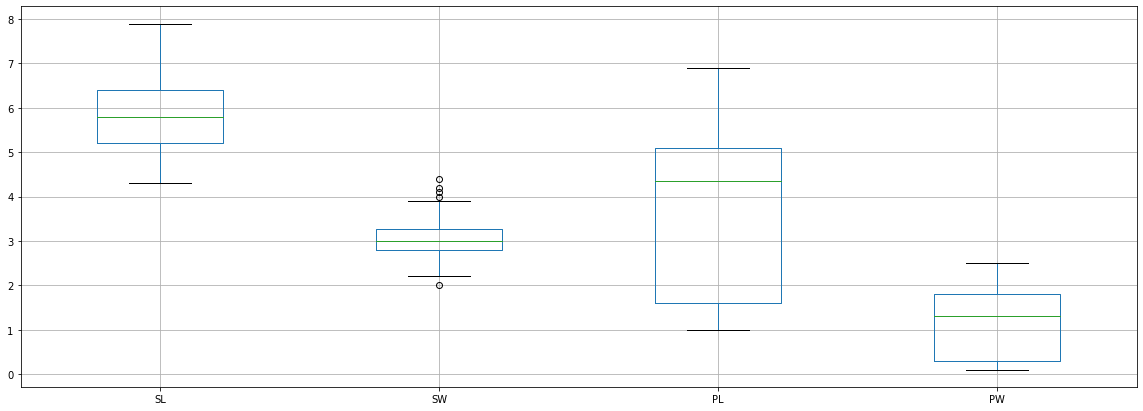

In [12]:
plt.figure(figsize=(20,7))
data.boxplot()
plt.show()

'Sepal Width' has outliers. We need to remove it 

In [13]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')




For Sepal Width  

Q1 =  2.8 
Q2 =  3.0 
Q3 =  3.25

IQR =  0.4500000000000002

Upper limit =  3.9250000000000003 
Lower limit =  2.1249999999999996

Outlier for Sepal Width are : [4.0, 4.4, 4.1, 4.2, 2.0]

Indexes to remove are Int64Index([14, 15, 32, 33, 60], dtype='int64')


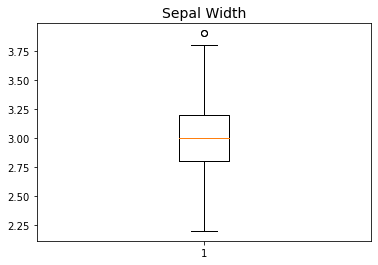

In [14]:

Q1=np.percentile(data['SW'],25,interpolation="midpoint")
Q2=np.percentile(data['SW'],50,interpolation="midpoint")
Q3=np.percentile(data['SW'],75,interpolation="midpoint")
print("\n\n\nFor Sepal Width ",'\n\nQ1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)
IQR=Q3-Q1
print('\nIQR = ',IQR)
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('\nUpper limit = ',up_lim,'\nLower limit = ',low_lim)
outlier=[]
for x in data['SW']:
    if (x < low_lim or x > up_lim):
        outlier.append(x)
print("\nOutlier for Sepal Width are :",outlier)
index1 = data['SW'] < low_lim 
index2 = data['SW'] > up_lim
index=data.loc[index1|index2].index
print("\nIndexes to remove are",index)
data=data.drop(index)
plt.boxplot(data['SW'])
plt.title('Sepal Width',fontsize=14)
plt.show()

In [15]:
data.shape

(145, 5)

Now there are only 145 observations after removing outliers

In [16]:
data['Classification'].nunique()

3

In [17]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

We need to do Label encoding to 'Classification' since it is the target Variable

In [18]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data["Classification"]=label_en.fit_transform(data["Classification"])

In [19]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


#### Spliting the features as, Feature variables and target variables

In [21]:
X = data.drop(["Classification"],axis=1)
y=data['Classification']
X.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int32

#### normalisation will give better result for classification algorithms

In [23]:
from sklearn.preprocessing import normalize
X = normalize(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


In [24]:
X.shape

(145, 4)

In [25]:
X.head()

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.858812,0.473827,0.192492,0.029614
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [26]:
#importing train_test_split library from model_selection
from sklearn.model_selection import train_test_split
#creating the instances
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [27]:
X_train.shape

(116, 4)

In [28]:
X_test.shape

(29, 4)

In [29]:
y_train.shape

(116,)

In [30]:
y_test.shape

(29,)

### a) Logistic Regression

In [31]:
#importing logistic regression from linear model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_predict = logit_model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [33]:
print("Accuracy is :", accuracy_score(y_test,y_predict))
print("Precision is :", precision_score(y_test,y_predict, average='macro'))
print("Recall is :", recall_score(y_test,y_predict, average='macro'))
print("F1 score is :", f1_score(y_test,y_predict, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_predict))

Accuracy is : 0.8275862068965517
Precision is : 0.8958333333333334
Recall is : 0.8148148148148149
F1 score is : 0.8100664767331435



Confusion matrix

 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]


### b) KNN- K Nearest Neighbor

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#creating empty list for finding optimal K values(Accuracy values)
acc_value = []
#creating neighbors as 3 to 15
neighbors = np.arange(3,15)
for k in neighbors:
    # taking instances for KNN into variable name classifier using the method minkowski
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_value.append(acc)

In [36]:
acc_value

[0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931]

Text(0, 0.5, 'Accuracy values')

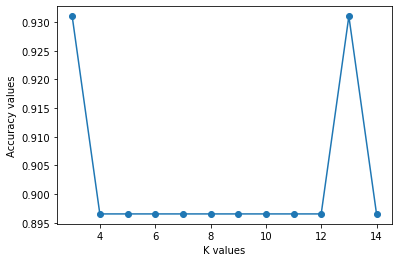

In [37]:
plt.plot(neighbors,acc_value,"o-")
plt.xlabel("K values")
plt.ylabel("Accuracy values")

k=3 and k=13 are the most optimal K-values since they produce high accuracy lets give K=3

In [38]:
classifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [39]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9310344827586207
Precision is : 0.9326599326599326
Recall is : 0.9326599326599326
F1 score is : 0.9326599326599326



Confusion matrix

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


### c) SVM- Support Vector Machine

In [40]:
#importing SVC from SVM
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred=svm_rbf.predict(X_test)

In [41]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9655172413793104
Precision is : 0.9722222222222222
Recall is : 0.9629629629629629
F1 score is : 0.9658994032395567



Confusion matrix

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


### d) Decision Tree

In [42]:
#importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
dec_tree_model=DecisionTreeClassifier()
dec_tree_model.fit(X_train,y_train)
y_pred=dec_tree_model.predict(X_test)

In [43]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9310344827586207
Precision is : 0.9487179487179488
Recall is : 0.9259259259259259
F1 score is : 0.9305555555555555



Confusion matrix

 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]


### e) Random Forest Model

In [44]:
#importing RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rand_f=RandomForestClassifier()
rand_f.fit(X_train,y_train)
y_pred=rand_f.predict(X_test)

In [45]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9655172413793104
Precision is : 0.9722222222222222
Recall is : 0.9629629629629629
F1 score is : 0.9658994032395567



Confusion matrix

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


##### Verifying the feature Importance

In [46]:
pd.Series(rand_f.feature_importances_,index=X.columns).sort_values(ascending=False)*100

3    39.176129
2    30.763979
1    22.417119
0     7.642773
dtype: float64

In [47]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

The first column corresponds to 'Sepal length'and it has the least Feature importance

##### Fine tuning of hyper parameter

In [48]:
rf_tune = RandomForestClassifier(n_estimators=500, max_depth=20,random_state=42,criterion="entropy")

In [49]:
rf_tune.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500,
                       random_state=42)

In [50]:
y_pred=rf_tune.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))

Accuracy is : 0.9655172413793104
Precision is : 0.9722222222222222
Recall is : 0.9629629629629629
F1 score is : 0.9658994032395567


Tuning is not effective since it is a small data set

### f) Gradient Boosting

In [51]:
#importing GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
grad_b=GradientBoostingClassifier()
grad_b.fit(X_train, y_train)
y_pred=grad_b.predict(X_test)

In [52]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9310344827586207
Precision is : 0.9326599326599326
Recall is : 0.9326599326599326
F1 score is : 0.9326599326599326



Confusion matrix

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


### g) Extreme Gradient Boosting

In [53]:
#importing XGBClassifier from xgboost
from xgboost import XGBClassifier

In [54]:
xg_boost=XGBClassifier()
xg_boost.fit(X_train,y_train)
y_pred=xg_boost.predict(X_test)

[20:12:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [55]:
print("Accuracy is :", accuracy_score(y_test,y_pred))
print("Precision is :", precision_score(y_test,y_pred, average='macro'))
print("Recall is :", recall_score(y_test,y_pred, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred))

Accuracy is : 0.9655172413793104
Precision is : 0.9722222222222222
Recall is : 0.9629629629629629
F1 score is : 0.9658994032395567



Confusion matrix

 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


### 'Extreme Gradient Boosting', 'Random Forest Model' and 'SVM-Support Vector Machine' gives the best result